In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
test_values = pd.read_csv('test_values.csv',index_col='building_id')

In [20]:
set_train = train_values.merge(train_labels)
set_train.drop( columns=["building_id"], inplace=True)
set_train = set_train[set_train['count_floors_pre_eq'] <= 6]
set_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


In [21]:
drop_columns = set_train.columns.values[26:38]
set_train.drop(columns= drop_columns, inplace = True)

In [22]:
land_surface_condition = pd.DataFrame()

In [23]:
foundation_type = pd.DataFrame()

In [24]:
land_surface_condition[['n', 'o', 't']]= pd.get_dummies(set_train['land_surface_condition'])
foundation_type[['h', 'i', 'r', 'u', 'w']]= pd.get_dummies(set_train['foundation_type'])

In [25]:
land_surface_condition['n']  = land_surface_condition['n'] * land_surface_condition['n'].mean()
land_surface_condition['o']  = land_surface_condition['o'] * land_surface_condition['o'].mean()
land_surface_condition['t']  = land_surface_condition['t'] * land_surface_condition['t'].mean()

In [26]:
foundation_type['h'] = foundation_type['h'] * foundation_type['h'].mean()
foundation_type['i'] = foundation_type['i'] * foundation_type['i'].mean()
foundation_type['r'] = foundation_type['r'] * foundation_type['r'].mean()
foundation_type['u'] = foundation_type['u'] * foundation_type['u'].mean()
foundation_type['w'] = foundation_type['w'] * foundation_type['w'].mean()

In [27]:
set_train['land_surface_condition'] = land_surface_condition['n'] + land_surface_condition['o'] + land_surface_condition['t']
set_train['foundation_type'] = foundation_type['h'] + foundation_type['i'] + foundation_type['r'] + foundation_type['u'] + foundation_type['w']

set_train['base_condition'] = set_train['land_surface_condition'] + set_train['foundation_type']

In [28]:
#set_train['base_condition'] = land_surface_condition['n'] + land_surface_condition['o'] + land_surface_condition['t']
#set_train['base_condition'] += (foundation_type['h'] + foundation_type['i'] + foundation_type['r'] + foundation_type['u'] + foundation_type['w'])

<AxesSubplot:>

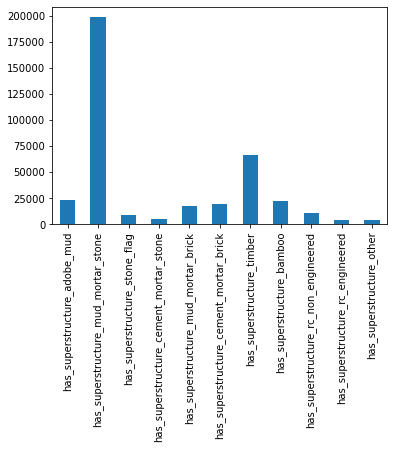

In [29]:
set_train.iloc[:, 14:25].sum().plot.bar()

In [30]:
values = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
vector_names = ['has_superstructure_rc_engineered', 'has_superstructure_rc_non_engineered', 'has_superstructure_cement_mortar_brick',
               'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone',
               'has_superstructure_stone_flag', 'has_superstructure_timber', 'has_superstructure_adobe_mud', 
               'has_superstructure_bamboo', 'has_superstructure_other']

In [31]:
for i in range(11):
    set_train.loc[:, [vector_names[i]]] = set_train.loc[:, [vector_names[i]]]*values[i]
set_train.iloc[:, 14:26].head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status
0,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,v
1,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,v
2,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,v
3,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.1,0.0,0,0.0,v
4,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,v


In [32]:
set_train['sum_columns'] = 0
for x in range(11):
    set_train['sum_columns'] += set_train[vector_names[x]]

set_train['sum_columns'].head()

0    0.7
1    0.5
2    0.5
3    0.9
4    0.2
Name: sum_columns, dtype: float64

In [33]:
columnas_seleccionadas = ['age',
                         'geo_level_1_id',
                         'area_percentage',
                         'count_floors_pre_eq',
                         'geo_level_2_id',
                         'height_percentage',
                         'sum_columns',
                         'base_condition']
train_values_subset = set_train[columnas_seleccionadas]
train_labels = set_train.loc[:, 'damage_grade']

In [34]:
train, test = train_test_split(set_train, test_size = 0.20, shuffle = False)

In [35]:
train_values_subset = train[columnas_seleccionadas]
train_labels = train.loc[:, 'damage_grade']

In [36]:
test_values_subset = test[columnas_seleccionadas]
test_labels = test.loc[:, 'damage_grade']

In [37]:
train_values_subset = pd.get_dummies(train_values_subset)

In [38]:
#param_grid = {'randomforestclassifier__n_estimators': [20],
  #            'randomforestclassifier__max_depth': [30],
 #             'randomforestclassifier__max_features': [4]
#             }
              # COMENTADO------------------------------

In [39]:
#pipe = make_pipeline(StandardScaler(), 
 #                   RandomForestClassifier(random_state=1))
# COMENTADO------------------------------

In [40]:
#rf_model = GridSearchCV(pipe, param_grid, cv=5)
# COMENTADO------------------------------

In [41]:
rf_model = RandomForestClassifier(random_state=1, n_estimators=20, max_features=4, max_depth=30)
#  noooooooooooo COMENTADO------------------------------

In [42]:
rf_model.fit(train_values_subset, train_labels.values.ravel())

RandomForestClassifier(max_depth=30, max_features=4, n_estimators=20,
                       random_state=1)

In [43]:
#rf_model.best_params_
# COMENTADO------------------------------

In [44]:
preds = rf_model.predict(test_values_subset)
f1_score(test_labels, preds, average='micro')

0.6930841264967762

In [45]:
for i in range(11):
    test_values.loc[:, [vector_names[i]]] = test_values.loc[:, [vector_names[i]]]*values[i]
test_values['sum_columns'] = 0
for x in range(11):
    test_values['sum_columns'] += test_values[vector_names[x]]

In [46]:
foundation = pd.DataFrame()


land_surface = pd.DataFrame()
land_surface[['n', 'o', 't']]= pd.get_dummies(test_values['land_surface_condition'])
foundation[['h', 'i', 'r', 'u', 'w']]= pd.get_dummies(test_values['foundation_type'])
foundation['h'] = foundation['h'] * foundation['h'].mean()
foundation['i'] = foundation['i'] * foundation['i'].mean()
foundation['r'] = foundation['r'] * foundation['r'].mean()
foundation['u'] = foundation['u'] * foundation['u'].mean()
foundation['w'] = foundation['w'] * foundation['w'].mean()

land_surface['n']  = land_surface['n'] * land_surface['n'].mean()
land_surface['o']  = land_surface['o'] * land_surface['o'].mean()
land_surface['t']  = land_surface['t'] * land_surface['t'].mean()

test_values['base_condition'] = land_surface['n'] + land_surface['o'] + land_surface['t'] + foundation['h'] + foundation['i'] + foundation['r'] + foundation['u'] + foundation['w']

In [47]:
test_values_subset = test_values[columnas_seleccionadas]
test_values_subset = pd.get_dummies(test_values_subset)

In [48]:
predictions = rf_model.predict(test_values_subset)

In [49]:
submission_format = pd.read_csv('submission_format.csv',index_col='building_id')

In [50]:
my_submission = pd.DataFrame(data=predictions, columns=submission_format.columns,
                            index=submission_format.index)

In [51]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,3
890251,3
745817,1
421793,3


In [52]:
my_submission.to_csv('submision.csv')

In [53]:
!head submision.csv

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [54]:
# Gini importance
rf_model.feature_importances_

array([0.17117135, 0.17074878, 0.17613079, 0.0294646 , 0.21761511,
       0.08803804, 0.07482905, 0.07200228])

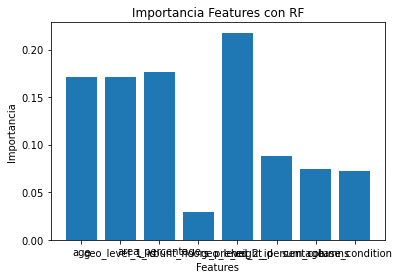

In [55]:
plt.bar(test_values_subset.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()